**Prediksi Harga Mobil -Submission Machine Learning Terapan**

Oleh: Karimuddin Hakim Hasibuan

# Menyiapkan dataset

Pada tahapan ini dataset akan diimport ke dalam google colab melalui kaggle. Tujuannya untuk menggunakan dataset sebagai data yang akan menjadi model prediksi harga mobil.

In [1]:
# import kredential akun dari kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karimhasibuan","key":"7d5ee7965ad80e500222fdf95bf66cfb"}'}

In [2]:
# mengatur akses kredential akun kaggle agar dapat menggunakan API Kaggle untuk mengunduh dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# mengunduh dataset dari kaggle
!kaggle datasets download -d suraj520/car-sales-data

 99% 85.0M/85.8M [00:05<00:00, 20.5MB/s]
100% 85.8M/85.8M [00:05<00:00, 17.2MB/s]


In [4]:
# mengekstrak file zip dataset agar dapat digunakan
import zipfile
zip_ref = zipfile.ZipFile('car-sales-data.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [5]:
# menampilkan 5 data teratas dan 5 paling bawah pada dataset

import pandas as pd

dataset = pd.read_csv('car_sales_data.csv')
print('5 Data teratas:')
print(dataset.head())

print('5 data terbawah:')
print(dataset.tail())

5 Data teratas:
         Date      Salesperson   Customer Name Car Make  Car Model  Car Year  \
0  2022-08-01  Monica Moore MD     Mary Butler   Nissan     Altima      2018   
1  2023-03-15     Roberto Rose  Richard Pierce   Nissan      F-150      2016   
2  2023-04-29     Ashley Ramos    Sandra Moore     Ford      Civic      2016   
3  2022-09-04   Patrick Harris    Johnny Scott     Ford     Altima      2013   
4  2022-06-16       Eric Lopez   Vanessa Jones    Honda  Silverado      2022   

   Sale Price  Commission Rate  Commission Earned  
0       15983         0.070495            1126.73  
1       38474         0.134439            5172.40  
2       33340         0.114536            3818.63  
3       41937         0.092191            3866.20  
4       20256         0.113490            2298.85  
5 data terbawah:
               Date     Salesperson    Customer Name   Car Make  Car Model  \
2499995  2022-05-26  Isabella Moore      Shirley Lee  Chevrolet  Silverado   
2499996  2022-10-0

# Pre-prosesing data

Pada tahapan ini data akan melalui proses Exploratory Data Analysis (EDA). Bertujuan untuk mendapatkan insight data.

1. Mengecek tipe data pada setiap kolom.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


2. Menampilkan distribusi data yang digunakan.

In [7]:
dataset.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


3. Memeriksa apakah terdapat nilai null pada setiap kolom.

In [8]:
# Memeriksa nilai null atau missing value pada setiap kolom
missing_values = dataset.isnull().sum()

# Menampilkan jumlah nilai null pada setiap kolom
print("Jumlah nilai null pada setiap kolom:")
print(missing_values)


Jumlah nilai null pada setiap kolom:
Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64


4. Memeriksa apakah terdapat nilai 0 pada kolom 'Car Year' dan 'Sale Price'. Hal ini dilakukan karna tidak mungkin tahun pembuatan dan harga mobil senilai 0.

In [9]:
# Memeriksa nilai yang sama dengan 0 pada kolom 'Car Year'
car_year_zeros = (dataset['Car Year'] == 0).sum()
print("Jumlah nilai 0 pada kolom 'Car Year':", car_year_zeros)

# Memeriksa nilai yang sama dengan 0 pada kolom 'Sale Price'
sale_price_zeros = (dataset['Sale Price'] == 0).sum()
print("Jumlah nilai 0 pada kolom 'Sale Price':", sale_price_zeros)


Jumlah nilai 0 pada kolom 'Car Year': 0
Jumlah nilai 0 pada kolom 'Sale Price': 0


5. Memeriksa apakah terdapat baris yang memiliki data duplikat.

In [10]:
# memeriksa baris yang duplikat
dataset.duplicated().sum()

0

6. Mengecek data outlier menggunakan metode IQR (Interquartile Range) dan menghapus data yang outlier pada data numerik yaitu (Car Year, Sale Price, Commission Rate, Commission Earned).

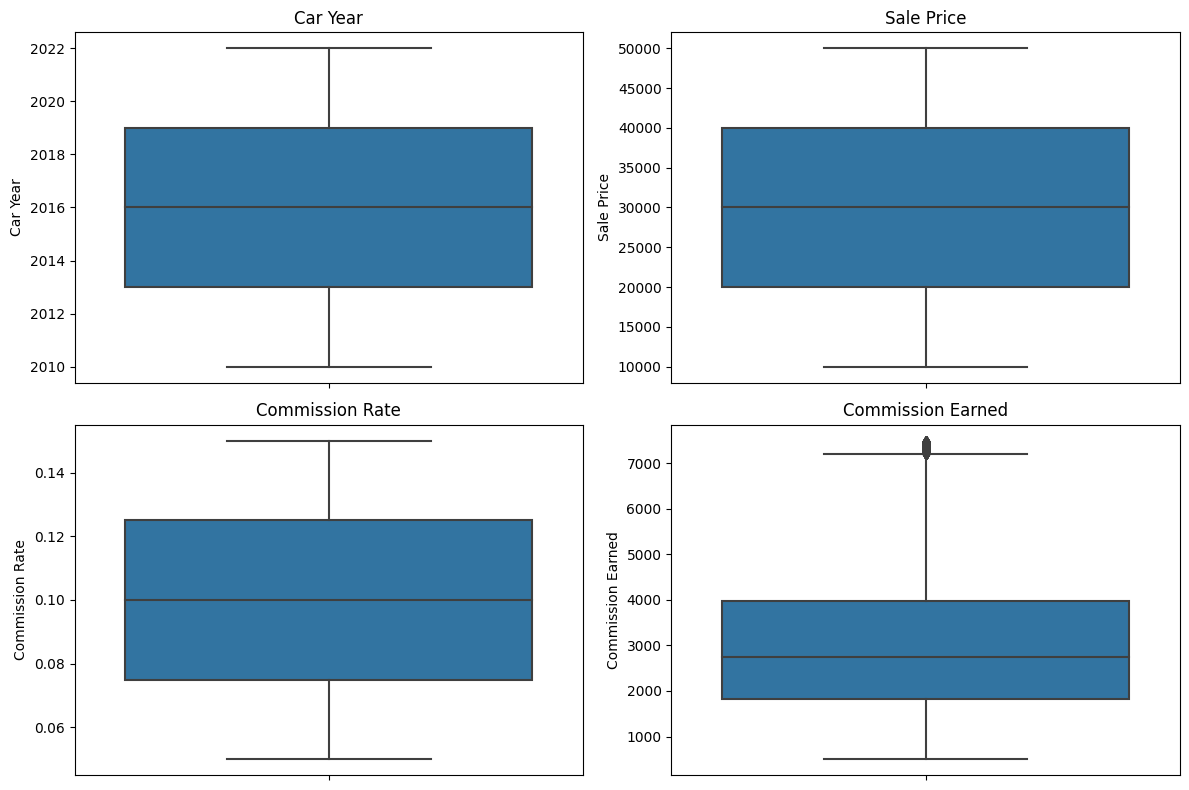

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom-kolom numerik
numeric_columns = ['Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned']

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=dataset, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()


In [12]:
# Memilih kolom-kolom numerik
numeric_columns = ['Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned']

# Menghitung batas bawah (lower bound) dan batas atas (upper bound) menggunakan metode IQR
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung jumlah data yang dianggap sebagai outlier
    num_outliers = len(dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)])

    # Menampilkan hasil
    print("Jumlah outlier pada kolom", column, ":", num_outliers)

Jumlah outlier pada kolom Car Year : 0
Jumlah outlier pada kolom Sale Price : 0
Jumlah outlier pada kolom Commission Rate : 0
Jumlah outlier pada kolom Commission Earned : 3432


Berdasarkan hasil diatas, dapat diketahui bahwa kolom Commission Earned memiliki data outliers. Untuk itu, data yang outliers akan dihapus.

In [13]:
# Menghapus data outlier berdasarkan metode IQR
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus data outlier
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

# Menampilkan dataset yang telah dihapus outlier
print(len(dataset))

2496568


Setelah menghapus data yang outlier, sekarang jumlah datanya adalah 2496568.

7. Menampilkan distribusi data pada setiap kolom. Bertujuan untuk mendapatkan informasi lebih mengenai data.

In [14]:
# Menghitung frekuensi masing-masing tanggal (Date)
date_counts = dataset['Date'].value_counts().reset_index()

# Mengubah nama kolom
date_counts.columns = ['Date', 'Frequency']

# Menampilkan tabel frekuensi
print(date_counts)


           Date  Frequency
0    2022-12-24       7136
1    2022-10-19       7042
2    2022-08-23       7020
3    2022-06-19       7019
4    2022-12-26       7016
..          ...        ...
361  2022-11-14       6605
362  2023-01-12       6604
363  2022-08-28       6590
364  2023-04-29       6580
365  2022-12-08       6578

[366 rows x 2 columns]


In [15]:
# Mengkonversi kolom 'Date' menjadi tipe data date
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Mendapatkan tahun dari setiap tanggal
dataset['Year'] = dataset['Date'].dt.year

# Menghitung frekuensi masing-masing tahun
year_counts = dataset['Year'].value_counts().reset_index()

# Mengubah nama kolom
year_counts.columns = ['Year', 'Frequency']

# Menampilkan tabel frekuensi berdasarkan tahun
print(year_counts)


   Year  Frequency
0  2022    1672227
1  2023     824341


Berdasarkan hasil diatas, dapat diketahui bahwa tahun penjualan lebih banyak terjadi pada tahun 2022. Selanjutnya, mari kita analisis data Salesperson dan Customer Name.

In [16]:
# Menghitung frekuensi masing-masing Salesperson
salesperson_counts = dataset['Salesperson'].value_counts()

# Membuat DataFrame dan mengurutkannya berdasarkan frekuensi
salesperson_table = pd.DataFrame({'Salesperson': salesperson_counts.index, 'Frequency': salesperson_counts.values})
salesperson_table = salesperson_table.sort_values(by='Frequency', ascending=False)

# Menampilkan tabel frekuensi yang diurutkan
print(salesperson_table)

                 Salesperson  Frequency
0              Michael Smith       1227
1            Michael Johnson        976
2                David Smith        821
3                James Smith        795
4           Michael Williams        752
...                      ...        ...
361523  Dr. Travis Nicholson          1
361524         Ricardo Terry          1
361525      Dr. Jacob Morrow          1
361526  Dr. Donald Guzman MD          1
518349     Mr. Calvin Hardin          1

[518350 rows x 2 columns]


Berdasarkan hasil diatas, dapat diketahui bahwa top 5 sales adalah Michael Smith, Michael Johnson, David Smith, James Smith, dan Jennifer Smith dengan angka penjualan secara berurutan adalah 1227, 976, 821, 795, dan 752. Total sales sebanyak 518350 sales.

In [17]:
# Menghitung frekuensi masing-masing Customer Name
customer_counts = dataset['Customer Name'].value_counts()

# Membuat DataFrame dan mengurutkannya berdasarkan frekuensi
customer_table = pd.DataFrame({'Customer Name': customer_counts.index, 'Frequency': customer_counts.values})
customer_table = customer_table.sort_values(by='Frequency', ascending=False)

# Menampilkan tabel frekuensi customer yang diurutkan
print(customer_table)

                 Customer Name  Frequency
0                Michael Smith       1163
1              Michael Johnson        889
2                  David Smith        795
3                  James Smith        788
4               Jennifer Smith        786
...                        ...        ...
361644         Larry Burke Jr.          1
361645            Tristan Dean          1
361646              Troy Yates          1
361647       Preston Velasquez          1
517934  Mrs. Suzanne Glenn PhD          1

[517935 rows x 2 columns]


Berdasarkan hasil diatas, dapat diketahui bahwa top 5 customer adalah Michael Smith, Michael Johnson, David Smith, James Smith, dan Jennifer Smith dengan angka penjualan secara berurutan adalah 1163, 889, 795, 788, dan 786. Total customer sebanyak 517935 customer.

In [18]:
# Mengambil nama unik dari kolom Salesperson
salesperson_names = set(dataset['Salesperson'].unique())

# Mengambil nama unik dari kolom Customer Name
customer_names = set(dataset['Customer Name'].unique())

# Menggabungkan dua set nama
combined_names = salesperson_names.union(customer_names)

# Menghitung jumlah nama yang muncul di kedua kolom
total_names = len(combined_names)

# Menampilkan nama-nama yang ada pada kedua kolom dan jumlahnya
print("Nama-nama yang ada pada kedua kolom Salesperson dan Customer Name:")
for name in combined_names:
    print(name)

print("Jumlah nama yang muncul pada kedua kolom:", total_names)


Output streaming akan dipotong hingga 5000 baris terakhir.
Mr. Robert Ramsey
Dr. Tracey Alvarez MD
Ivan Lester
Dr. Devin Jones
April Wang
Mrs. Robin Bridges
Mercedes Bentley
Abigail Sosa
Clinton Willis
Lawrence Nichols
Bruce Mcintosh
Nichole Villegas
Mike Cherry
Cheryl Bradshaw
Ricardo Houston
Linda Montgomery
Melanie Pena
Russell Daniel
Kirk Obrien
Austin Lam
Ms. Patricia Yang
Danielle Castro DDS
Amanda Orr MD
Francisco Dudley
Audrey Cortez
Veronica Harmon
Erik Dickerson
Kimberly Murray MD
Marc Le
Kerri Hunt
Chris Patrick
Bianca Sanchez
Mr. Harry Fernandez
Mr. Ryan Gonzales MD
Dr. Heather Hoffman
Bryan Wu
Chase Ross
Colin Peck
William Donovan
Kelly Raymond
Tricia Robbins
John Cunningham
Ashley Craig
Mrs. Cassidy Morse
Dr. Sherri White
Lauren Arias
Bethany Oneill
Dr. Steven Edwards Jr.
Maurice Ashley
Tracy Hopkins
Mrs. Morgan Flores
Patrick Harmon
Frank Smith PhD
Kathy Vega
Breanna Gilbert
John Choi MD
Mr. Charles Stone
Mrs. Christy King
Janet Park
Victor Pena
Jerry Rhodes
Lisa Riggs
M

Berdasarkan hasil pemeriksaan diatas, ternyata ditemukan 698362 nama yang merupakan Sales dan Customer. Selanjutnya, kita analisis data Car Make (merk mobil yang dibeli).

In [19]:
# Menghitung frekuensi masing-masing Car Make
car_make_counts = dataset['Car Make'].value_counts()

# Mengurutkan frekuensi dari yang paling banyak
car_make_counts = car_make_counts.sort_values(ascending=False)

# Menampilkan tabel frekuensi Car Make yang diurutkan
print(car_make_counts)


Honda        500048
Chevrolet    499719
Toyota       499491
Ford         499072
Nissan       498238
Name: Car Make, dtype: int64


Berdasarkan hasil diatas, dapat diketahui merk yang paling banyak laku adalah Honda. Sedangkan, merk mobil yang paling sedikit laku adalah Nissan. Selanjutnya, kita analisis model dari merk mobil yang dibeli berdasarkan data pada kolom Car Model.

In [20]:
# Menghitung frekuensi masing-masing Car Model
car_model_counts = dataset['Car Model'].value_counts()

# Mengurutkan frekuensi dari yang paling banyak
car_model_counts = car_model_counts.sort_values(ascending=False)

# Menampilkan tabel frekuensi Car Model yang diurutkan
print(car_model_counts)

Silverado    500114
Civic        499833
Corolla      499483
F-150        498984
Altima       498154
Name: Car Model, dtype: int64


Berdasarkan hasil diatas, dapat diketahui model yang paling banyak laku adalah Silverado. Sedangkan, model mobil yang paling sedikit laku adalah Altima. Namun, model Silverado dari merk Chevrolet memiliki angka penjualan model tertinggi, padahal untuk kategori merk, merk Honda merupakan yang tertinggi. Selanjutnya, menganalisis persoalan tersebut.

In [21]:
# Mengambil data unique Car Make dan Car Model
unique_car_make = dataset['Car Make'].unique()
unique_car_model = dataset['Car Model'].unique()

# Menampilkan data unique Car Make
print("Unique Car Make:")
print(unique_car_make)

# Menampilkan data unique Car Model
print("Unique Car Model:")
print(unique_car_model)

# Menghitung frekuensi Silverado dan Civic
silverado_count = dataset.loc[dataset['Car Model'] == 'Silverado', 'Car Make'].value_counts()
civic_count = dataset.loc[dataset['Car Model'] == 'Civic', 'Car Make'].value_counts()

# Menampilkan frekuensi Silverado dan Civic
print("Frekuensi Silverado:")
print(silverado_count)
print("Frekuensi Civic:")
print(civic_count)


Unique Car Make:
['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet']
Unique Car Model:
['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']
Frekuensi Silverado:
Honda        100548
Ford         100150
Chevrolet    100053
Nissan        99923
Toyota        99440
Name: Car Make, dtype: int64
Frekuensi Civic:
Honda        100383
Chevrolet    100290
Ford          99828
Toyota        99773
Nissan        99559
Name: Car Make, dtype: int64


Berdasarkan hasil diatas, ternyata untuk model Silverado juga dimiliki oleh setiap merk mobil, begitu juga dengan model Civic. Selanjutnya, menganalisis data pada kolom Car Year untuk mengetahui tahun penjualan mobil.

2013    192705
2020    192394
2017    192387
2015    192299
2018    192288
2014    192251
2010    192189
2012    192183
2019    191985
2016    191982
2011    191555
2021    191371
2022    190979
Name: Car Year, dtype: int64


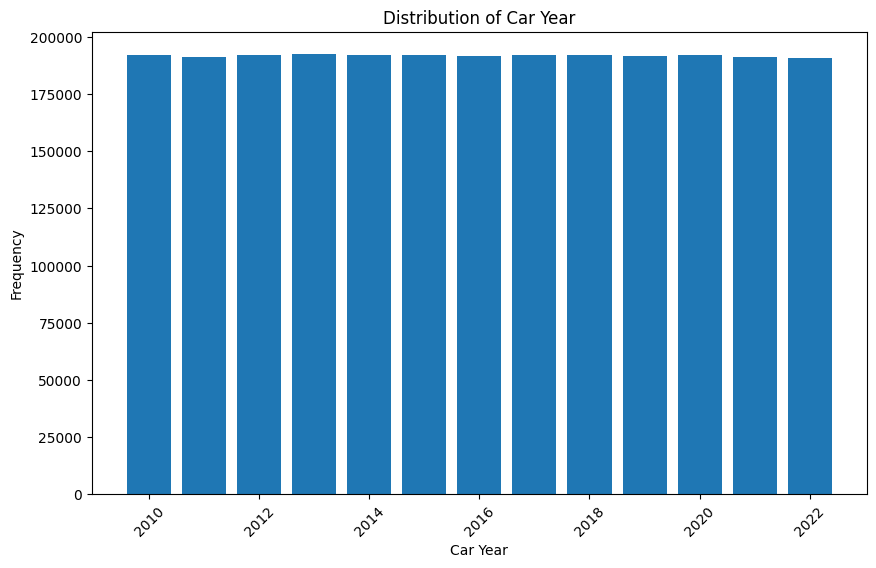

In [22]:
# Menghitung frekuensi masing-masing Car Year
car_year_counts = dataset['Car Year'].value_counts()

# Mengurutkan frekuensi dari yang paling banyak
car_year_counts = car_year_counts.sort_values(ascending=False)

# Menampilkan tabel frekuensi Car Year yang diurutkan
print(car_year_counts)

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.bar(car_year_counts.index, car_year_counts.values)
plt.xlabel('Car Year')
plt.ylabel('Frequency')
plt.title('Distribution of Car Year')
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil diatas, dapat diketahui bahwa mobil tahun 2013 merupakan yang paling laku dan tahun 2022 merupakan tahun mobil yang paling sedikit dibandingkan yang lainnya. Selanjutnya, mari kita cari tahu seri mobil yang paling mahal dan paling murah berdasarkan data pada kolom Sale Price.

In [23]:
# Mendapatkan data dengan harga paling mahal
most_expensive = dataset.nlargest(1, 'Sale Price')
# Mendapatkan data dengan harga paling murah
cheapest = dataset.nsmallest(1, 'Sale Price')

# Menampilkan data dengan harga paling mahal
print("Merk mobil, model mobil, dan tahun mobil dengan harga paling mahal:")
print("Car Make:", most_expensive['Car Make'].values[0])
print("Car Model:", most_expensive['Car Model'].values[0])
print("Car Year:", most_expensive['Car Year'].values[0])
print("Sale Price:", most_expensive['Sale Price'].values[0])

# Menampilkan data dengan harga paling murah
print("Merk mobil, model mobil, dan tahun mobil dengan harga paling murah:")
print("Car Make:", cheapest['Car Make'].values[0])
print("Car Model:", cheapest['Car Model'].values[0])
print("Car Year:", cheapest['Car Year'].values[0])
print("Sale Price:", cheapest['Sale Price'].values[0])


Merk mobil, model mobil, dan tahun mobil dengan harga paling mahal:
Car Make: Nissan
Car Model: F-150
Car Year: 2013
Sale Price: 50000
Merk mobil, model mobil, dan tahun mobil dengan harga paling murah:
Car Make: Nissan
Car Model: Altima
Car Year: 2012
Sale Price: 10000


Berdasarkan hasil diatas, dapat diketahui merk mobil Nissan, model F-150 tahun 2013 merupakan mobil yang paling mahal. Sedangkan, merk mobil Nissan, model Altima tahun 2012 merupakan mobil yang paling murah. Selanjutnya, akan dilakukan persiapan dataset untuk diproses ke model Regresi Linear, Decision Tree, dan Random Forest.

In [24]:
print(dataset.columns)

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned',
       'Year'],
      dtype='object')


Kita akan melakukan drop pada kolom yang tidak relevan untuk diproses ke model seperti 'Date', 'Salesperson', 'Customer Name' dan 'Year'.

In [25]:
dataset = dataset.drop(['Date', 'Salesperson', 'Customer Name', 'Year'], axis=1)

Setelah kolom 'Date', 'Salesperson', 'Customer Name' dan 'Year' di drop, selanjutnya melakukan encoding pada variabel kategorikal yaitu pada kolom 'Car Make' dan  'Car Model'.

In [26]:
encoded_dataset = pd.get_dummies(dataset, columns=['Car Make', 'Car Model'])
print(encoded_dataset)

         Car Year  Sale Price  Commission Rate  Commission Earned  \
0            2018       15983         0.070495            1126.73   
1            2016       38474         0.134439            5172.40   
2            2016       33340         0.114536            3818.63   
3            2013       41937         0.092191            3866.20   
4            2022       20256         0.113490            2298.85   
...           ...         ...              ...                ...   
2499995      2021       49823         0.062977            3137.70   
2499996      2022       18803         0.068339            1284.97   
2499997      2010       30863         0.088915            2744.19   
2499998      2014       26125         0.088260            2305.80   
2499999      2010       20762         0.137105            2846.57   

         Car Make_Chevrolet  Car Make_Ford  Car Make_Honda  Car Make_Nissan  \
0                         0              0               0                1   
1            

Dataset yang sudah di encoding kemudian disimpan dalam variabel baru yaitu encoded_dataset. Selanjutnya, kita akan melakukan Feature Scaling pada kolom numerik menggunakan MinMaxScaler(), yang berfungsi untuk melakukan normalisasi dan standarisasi data.

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_dataset[['Car Year', 'Commission Rate', 'Commission Earned']])
encoded_dataset[['Car Year', 'Commission Rate', 'Commission Earned']] = scaled_features


In [28]:
encoded_dataset

,Car Year,Sale Price,Commission Rate,Commission Earned,Car Make_Chevrolet,Car Make_Ford,Car Make_Honda,Car Make_Nissan,Car Make_Toyota,Car Model_Altima,Car Model_Civic,Car Model_Corolla,Car Model_F-150,Car Model_Silverado
0,0.666667,15983,0.204951,0.093183,0,0,0,1,0,1,0,0,0,0
1,0.500000,38474,0.844388,0.695986,0,0,0,1,0,0,0,0,1,0
2,0.500000,33340,0.645359,0.494275,0,1,0,0,0,0,1,0,0,0
3,0.250000,41937,0.421907,0.501363,0,1,0,0,0,1,0,0,0,0
4,1.000000,20256,0.634898,0.267828,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,0.916667,49823,0.129769,0.392816,1,0,0,0,0,0,0,0,0,1
2499996,1.000000,18803,0.183384,0.116761,0,1,0,0,0,0,0,0,1,0
2499997,0.000000,30863,0.389152,0.334184,1,0,0,0,0,0,1,0,0,0
2499998,0.333333,26125,0.382602,0.268864,0,0,1,0,0,0,0,0,0,1


Selanjutnya, memisahkan kolom fitur dan target. Dalam hal ini, kolom fitur yaitu kolom selain 'Sale Price' dan kolom target adalah 'Sale Price'.

In [29]:
X = encoded_dataset.drop('Sale Price', axis=1)
y = encoded_dataset['Sale Price']

Melakukan pembagian dataset menjadi data latih dan data uji. Data latih akan digunakan untuk melatih model, sedangkan data uji akan digunakan untuk menguji performa model. Data latih dibagi menjadi 80% dan data uji 20% dari total dataset.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selanjutnya, melakukan modelling menggunakan algoritma Regresi Linear, Decision Tree dan K-Nearest Neighbors (KNN).

In [31]:
#Modelling menggunakan algoritma Linear Regression
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [32]:
#Modelling menggunakan algoritma Decision Tree
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Modelling menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

Setelah dilakukan modelling, selanjutnya dilakukan dengan melakukan evaluasi menggunakan matriks MSE dari hasil prediksi data pada model. Langkah pertama, adalah melakukan scaling terhadap fitur numerik.

In [34]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
numerical_features = ['Car Year', 'Commission Rate', 'Commission Earned']

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Selanjutnya, dilakukan evaluasi menggunakan matriks MSE pada hasil prediksi.

In [35]:
from sklearn.metrics import mean_squared_error

# Evaluasi model Regresi Linear
linear_regression_pred = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)
print("MSE Regresi Linear:", linear_regression_mse)

# Evaluasi model Decision Tree
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
print("MSE Decision Tree:", decision_tree_mse)

# Evaluasi model KNN
knn_pred = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
print("MSE KNN:", knn_mse)


MSE Regresi Linear: 25473886700.647568
MSE Decision Tree: 532218564.783507
MSE KNN: 458917127.94517064


Berdasarkan hasil diatas, dapat diketahui bahwa Decision Tree maupun KNN memberikan hasil prediksi yang lebih baik dengan nilai MSE yang lebih rendah dibandingkan Regresi Linear. Oleh karena itu, untuk dataset ini, model Decision Tree dan KNN lebih disarankan untuk digunakan dalam melakukan prediksi Sale Price.

In [36]:
prediksi = X_test.iloc[:1].copy()
print("Sale Price Asli:", y_test[:1])

# Prediksi menggunakan Regresi Linear
linear_regression_pred = linear_regression.predict(prediksi).round(1)
print("Prediksi Regresi Linear:", linear_regression_pred)

# Prediksi menggunakan Decision Tree
decision_tree_pred = decision_tree.predict(prediksi).round(1)
print("Prediksi Decision Tree:", decision_tree_pred)

# Prediksi menggunakan KNN
knn_pred = knn.predict(prediksi).round(1)
print("Prediksi KNN:", knn_pred)


Sale Price Asli: 1306640    44183
Name: Sale Price, dtype: int64
Prediksi Regresi Linear: [12908.]
Prediksi Decision Tree: [10008.]
Prediksi KNN: [10142.2]


Berdasarkan hasil pengujian prediksi diatas, memang hasil pada algoritma Decision Tree yang paling mendekati kemudian disusul oleh KNN dan ada algoritma Regresi Linear. Meski begitu, hasil prediksi masih jauh dari nilai asli.

Selanjutnya, kita akan melihat fitur apa yang paling berpengaruh dalam menentukan harga mobil menggunakan algoritma Decision Tree.

In [37]:
importance_scores = decision_tree.feature_importances_
feature_names = X_train.columns

# Mengurutkan skor pentingnya fitur secara menurun
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Menampilkan skor pentingnya fitur
for feature, score in zip(sorted_features, sorted_scores):
    print(f"{feature}: {score}")


Commission Earned: 0.7083596114915426
Commission Rate: 0.2916393391328188
Car Year: 3.5508657765664033e-07
Car Make_Nissan: 7.063261865244307e-08
Car Make_Chevrolet: 7.00748108697396e-08
Car Make_Honda: 6.990189761666656e-08
Car Make_Toyota: 6.96891741267272e-08
Car Model_Corolla: 6.941408407586903e-08
Car Make_Ford: 6.940481913553796e-08
Car Model_Altima: 6.930385630225143e-08
Car Model_F-150: 6.884493255337308e-08
Car Model_Civic: 6.874931215640748e-08
Car Model_Silverado: 6.827355540335475e-08


Hasil yang didapatkan menunjukkan skor pentingnya fitur dalam menentukan Sale Price. Setiap fitur memiliki skor penting yang dinyatakan sebagai angka.

Misalnya, "Commission Earned" memiliki skor penting sebesar 0.7083596164141285, yang berarti fitur tersebut memiliki pengaruh yang paling signifikan dalam menentukan Sale Price. Skor penting ini dapat diinterpretasikan sebagai persentase kontribusi fitur tersebut dalam mempengaruhi Sale Price.

Selanjutnya, "Commission Rate" memiliki skor penting sebesar 0.2916393396038089, yang menunjukkan bahwa fitur ini juga memiliki pengaruh yang cukup signifikan dalam menentukan Sale Price, meskipun tidak sebesar "Commission Earned".

Fitur-fitur lainnya, seperti "Car Year", "Car Make_Nissan", "Car Make_Toyota", dan seterusnya, memiliki skor penting yang sangat kecil, bahkan mendekati nol. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh yang relatif kecil atau kurang signifikan dalam memprediksi Sale Price.

Dalam konteks ini, skor penting yang lebih tinggi menandakan bahwa fitur tersebut memiliki pengaruh yang lebih besar dalam menentukan Sale Price, sedangkan skor penting yang lebih rendah menandakan pengaruh yang lebih kecil.

Dalam beberapa kasus, komisi yang diperoleh dan tingkat komisi yang diterapkan dapat mencerminkan karakteristik penjualan mobil tertentu. Misalnya, mobil dengan harga jual yang lebih tinggi mungkin memiliki komisi yang lebih besar, atau komisi yang diberikan untuk penjualan mobil tertentu mungkin lebih tinggi dibandingkan dengan mobil lainnya. Oleh karena itu, fitur-fitur ini dapat memberikan informasi penting dalam memprediksi Sale Price.